In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

df = pd.read_csv("hahow_course.csv")

In [66]:
to_date = ["proposal", "incubate", "estimateStart"]
for n in to_date:
    df[n] = pd.to_datetime(df[n]).apply(lambda x:x.date())

In [67]:
df['pro_month'] = df.proposal.apply(lambda x:x.month)
df['have'] = 1

In [68]:
df.head()

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have
0,0,LeonTV 空中網球課 - 學會擊球，享受比賽,Leon Tsai,2019-11-07,2019-10-09,2020-01-06,2019-10-09T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,1290,1990,False,INCUBATING,0,11,1
1,1,生活要清爽：讓空間煥然一新的整理收納課,欣講堂 xinforum,2019-11-06,2019-10-08,2020-01-05,2019-10-08T02:00:00.000Z,['DIGITAL'],0,0.0,False,30,1200,1580,False,INCUBATING,17,11,1
2,2,利息養成現金流：債券入門投資術,Z,2019-11-01,2019-10-03,2019-12-31,NaN,[],0,0.0,False,30,1288,1990,False,INCUBATING,28,11,1
3,3,Dropshipping 電商創業 - 零庫存跨境電商,Michael Lin,2019-10-31,2019-10-02,2019-12-30,NaN,[],0,0.0,False,30,1800,2900,False,INCUBATING,6,10,1
4,4,行銷業務動態儀表板與報告 - Power BI 應用,周勝輝,2019-10-30,2019-10-01,2019-12-29,NaN,[],0,0.0,False,30,1450,2500,False,INCUBATING,5,10,1


In [69]:
df['pro_month']

0      11
1      11
2      11
3      10
4      10
       ..
379     5
380     5
381     4
382     4
383     3
Name: pro_month, Length: 384, dtype: int64

In [70]:
#從圖上可觀察出七月、十月的是提案的旺季

data = [go.Scatter(
        x = df.groupby(df.pro_month).have.sum().index,
        y = df.groupby(df.pro_month).have.sum()
)]

layout={
"title":"提案數量分佈"
}

fig = dict(data=data, layout=layout)
py.iplot(fig)

Text(0.5, 0, 'Door')

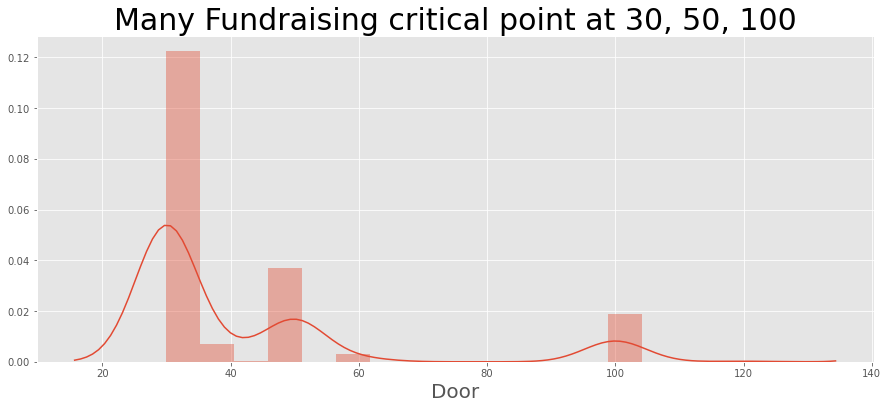

In [71]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
sns.distplot(df.successCriti, kde=True)
plt.title('Many Fundraising critical point at 30, 50, 100',  fontsize=30)
plt.xlabel('Door', fontsize=20)

<Figure size 432x288 with 0 Axes>

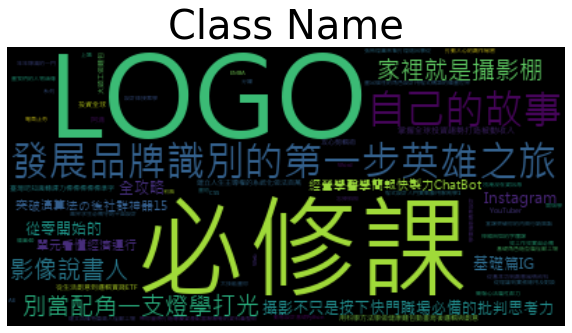

<Figure size 432x288 with 0 Axes>

In [72]:
from wordcloud import WordCloud
import jieba
high_gate_proposal = df[df.successCriti > 90]
# print(high_gate_proposal)
title = ''
for name in high_gate_proposal.title:
    title += name
removeword = []

for word in removeword:
    title = title.replace(word, '')
font_path = './微軟正黑體.ttf'
wordcloud = WordCloud(font_path = font_path).generate(title)
plt.figure(figsize=(10,8), facecolor='k', frameon=False)
plt.title('Class Name', fontsize=40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure()

In [73]:
df['await'] = df.solidTickets/df.successCriti
df.sort_values('await', ascending=False).head(20)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
320,320,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],213,4.60,False,100,990,1800,False,PUBLISHED,13581,6,1,135.810000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
66,66,用 Python 理財：打造自己的 AI 股票理專,FinLab,2019-04-18,2019-03-20,2019-06-17,NaN,[],56,4.95,False,30,2499,3999,False,PUBLISHED,2332,4,1,77.733333
243,243,從入門到業界實戰 - UI / UX 前端網頁設計,Louis,2017-05-27,2017-04-27,2017-07-11,NaN,[],80,4.80,False,30,650,2500,False,PUBLISHED,2317,5,1,77.233333
75,75,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",237,4.92,False,100,1200,1800,False,PUBLISHED,7619,3,1,76.190000
175,175,從上手到專業，寫出你想要的文案效果,林育聖,2018-04-04,2018-03-06,2018-05-04,NaN,[],82,4.83,False,30,1280,1680,False,PUBLISHED,2247,4,1,74.900000
280,280,比ㄅㄆㄇ簡單的韓語發音,王稚鈞,2016-11-05,2016-10-06,2016-11-30,NaN,[],84,5.00,False,50,990,1590,False,PUBLISHED,3530,11,1,70.600000
339,339,AE/MG || 動畫特效 Vol.1,Yan-K,2016-03-24,2016-02-23,2016-04-30,NaN,[],149,4.86,False,50,1000,1500,False,PUBLISHED,3395,3,1,67.900000
49,49,聲入人心-周震宇的人聲必修課,周震宇,2019-06-19,2019-05-21,2019-08-18,2019-05-20T16:00:00.000Z,['DIGITAL'],19,5.00,False,30,1680,2680,False,PUBLISHED,1938,6,1,64.600000


In [74]:
check_start = df[df.status == 'SUCCESS']
check_start['await'] = check_start.successCriti/check_start.solidTickets
check_start.sort_values('solidTickets', ascending = False).head(5)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
31,31,金融市場 x 程式交易：通往財富自由之路,Allen 劉曣全,2019-08-14,2019-07-16,2019-10-13,NaN,[],0,0.0,False,30,2950,4200,False,SUCCESS,518,8,1,0.057915
18,18,不用動腦的攝影課-七堂課拍出有質感的照片,peterhuang,2019-09-20,2019-08-22,2019-11-19,2019-08-22T04:00:00.000Z,['DIGITAL'],0,0.0,False,50,490,790,False,SUCCESS,473,9,1,0.105708
19,19,英雄之旅：自己的故事，別當配角,子雍 Tzu-Yung,2019-09-18,2019-08-20,2019-11-17,NaN,[],0,0.0,False,100,1490,2049,False,SUCCESS,444,9,1,0.225225
16,16,illustrator 入門：從形狀到美麗的向量插畫,Iris Lee,2019-09-26,2019-08-28,2019-11-25,NaN,[],0,0.0,False,30,980,1960,False,SUCCESS,319,9,1,0.094044
23,23,區塊鏈應用敲門磚：行動支付到商業案例,區塊勢｜許明恩,2019-09-05,2019-08-07,2019-11-04,2019-08-07T04:00:00.000Z,['DIGITAL'],0,0.0,False,50,1800,2399,False,SUCCESS,285,9,1,0.175439


In [75]:
pd.DataFrame(df.groupby(df.author).have.sum()).sort_values('have', ascending=False).head(15)

,have
author,
藍 國峰,5
Weihang Lidance Chou,4
李柏鋒,4
圖文不符,4
1MustLearn,4
Chang Hong Lin,4
Rainie Chiang,3
Tina Wu,3
Hank Tom,3


Text(0.5, 0, 'Averge evaluation')

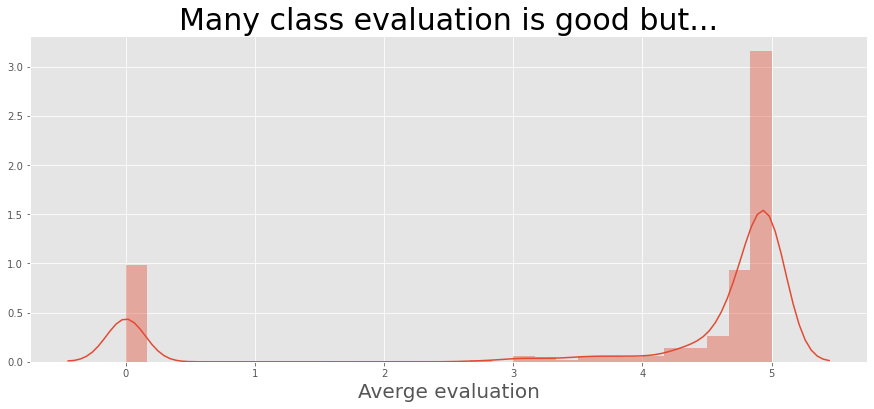

In [76]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
sns.distplot(df.avg_ratings, kde=True)
plt.title('Many class evaluation is good but...', fontsize=30)
plt.xlabel('Averge evaluation', fontsize=20)

count    384.000000
mean      31.208333
std       45.461008
min        0.000000
25%        6.000000
50%       15.000000
75%       36.250000
max      425.000000
Name: ratings, dtype: float64


Text(0.5, 0, 'Averge Message')

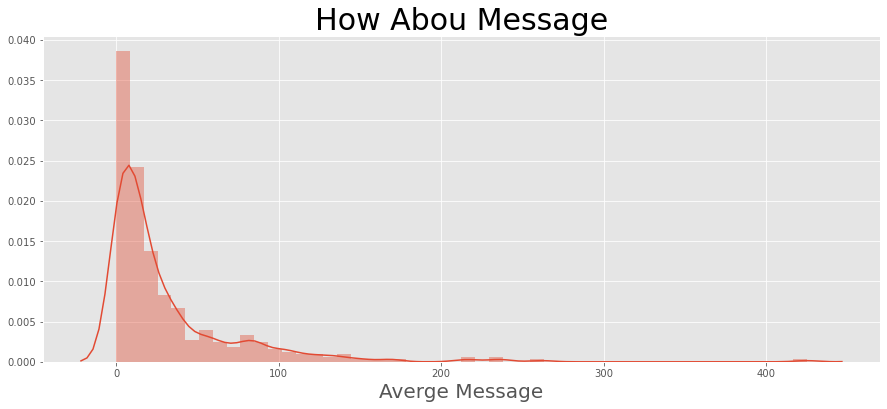

In [77]:
plt.style.use('ggplot')
print(df.ratings.describe())
plt.figure(figsize=(15,6))
sns.distplot(df.ratings, kde=True)
plt.title('How Abou Message', fontsize=30)
plt.xlabel('Averge Message', fontsize=20)

In [78]:
df[df.ratings>100].sort_values('avg_ratings', ascending=False)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
209,209,打動人心的創作秘密，畫出個性的角色設計,水晶孔,2017-10-25,2017-09-26,2017-11-30,NaN,[],168,4.99,False,100,880,1280,False,PUBLISHED,3262,10,1,32.620000
240,240,不必下蠱的人心攻略術 — 小說實戰技術,朱宥勳,2017-06-04,2017-05-05,2017-08-03,NaN,[],101,4.98,False,30,800,1500,False,PUBLISHED,1642,6,1,54.733333
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
216,216,當個水彩甜點師 — 雪莉的午茶繪畫課,Sherry雪莉,2017-09-27,2017-08-29,2017-11-26,NaN,[],139,4.96,False,30,880,1200,False,PUBLISHED,1135,9,1,37.833333
329,329,Cartoon 插畫 - 人物篇 (●—●),JUN CHIU,2016-05-09,2016-04-09,2016-07-08,NaN,[],136,4.96,False,30,300,500,False,PUBLISHED,1392,5,1,46.400000
178,178,240 分鐘 - 忘掉拍照，學會攝影,子雍 Tzu-Yung,2018-03-28,2018-02-27,2018-05-27,NaN,[],170,4.96,False,120,1490,2049,False,PUBLISHED,2512,3,1,20.933333
207,207,小資族理財的第一堂入門課,李柏鋒,2017-10-31,2017-10-02,2017-12-30,NaN,[],218,4.96,False,60,888,1688,False,PUBLISHED,1647,10,1,27.450000
108,108,興趣變副業！打造自己的手作品牌,張譯蓁,2018-11-28,2018-10-30,2019-01-27,NaN,[],120,4.95,False,30,1500,2500,False,PUBLISHED,806,11,1,26.866667
206,206,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],129,4.95,False,100,1880,2400,False,PUBLISHED,5508,11,1,55.080000


In [79]:
df[df.solidTickets >5000]

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
75,75,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",237,4.92,False,100,1200,1800,False,PUBLISHED,7619,3,1,76.19
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.30
206,206,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],129,4.95,False,100,1880,2400,False,PUBLISHED,5508,11,1,55.08
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.66
320,320,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],213,4.60,False,100,990,1800,False,PUBLISHED,13581,6,1,135.81


No Buy the class num: 
 0.7469550876856964


Text(0.5, 0, 'come to class num')

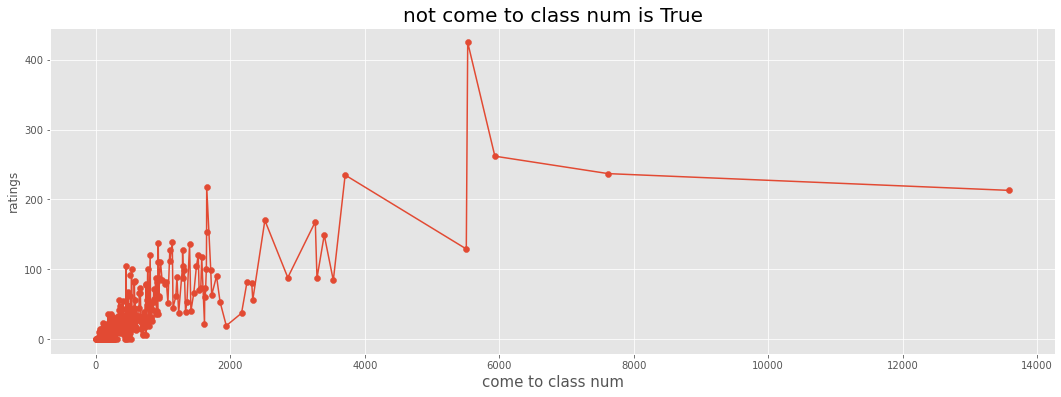

In [83]:
plt.figure(figsize=(18, 6))
print('No Buy the class num: \n', np.corrcoef(df.solidTickets, df.ratings)[1,0])
sns.lineplot(df.solidTickets, df.ratings)
plt.scatter(df.solidTickets, df.ratings)
plt.title('not come to class num is True', fontsize = 20)
plt.xlabel('come to class num', fontsize=15)

In [82]:
df['feedback_ratio'] = df.ratings / df.solidTickets
df.sort_values('feedback_ratio', ascending=False).head()

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,...,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await,feedback_ratio
369,369,火箭發射飛行中 Rocket 1,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],14,4.71,...,30,250,1200,False,PUBLISHED,53,8,1,1.766667,0.264151
212,212,資料庫設計 - 有效的使用系統資料,Ryan,2017-10-20,2017-09-21,2017-12-19,NaN,[],104,4.94,...,50,980,1890,False,PUBLISHED,449,10,1,8.980000,0.231626
368,368,火箭飛船遊太空 Rocket 2,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],10,5.00,...,30,250,1200,False,PUBLISHED,45,8,1,1.500000,0.222222
37,37,手作乾燥花 - 創造植感生活,Irene Hsu,2019-07-19,2019-06-20,2019-09-17,NaN,[],23,5.00,...,30,1200,1800,False,PUBLISHED,111,7,1,3.700000,0.207207
186,186,【不會畫圖】也能學會動態LINE貼圖製作,阿狗阿貓,2018-02-16,2018-01-18,2018-04-17,NaN,[],36,4.97,...,30,988,1488,False,PUBLISHED,182,2,1,6.066667,0.197802


count     384.000000
mean     1103.903646
std       676.481790
min        99.000000
25%       600.000000
50%       990.000000
75%      1500.000000
max      4800.000000
Name: prePrice, dtype: float64


Text(0.5, 0, 'Pre price')

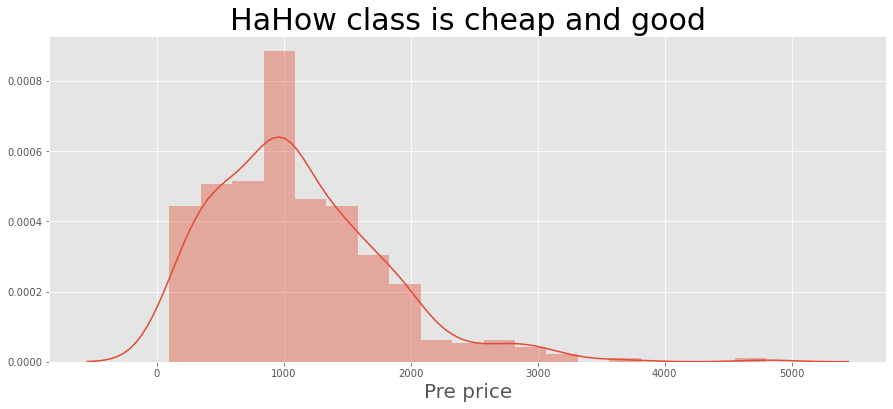

In [87]:
plt.style.use('ggplot')
print(df.prePrice.describe())
plt.figure(figsize= (15, 6))
sns.distplot(df.prePrice, kde=True)
plt.title('HaHow class is cheap and good', fontsize=30)
plt.xlabel('Pre price', fontsize=20)

count     384.000000
mean     1673.153646
std       964.759503
min       150.000000
25%       996.750000
50%      1595.000000
75%      2200.000000
max      7680.000000
Name: price, dtype: float64


Text(0.5, 0, 'True price')

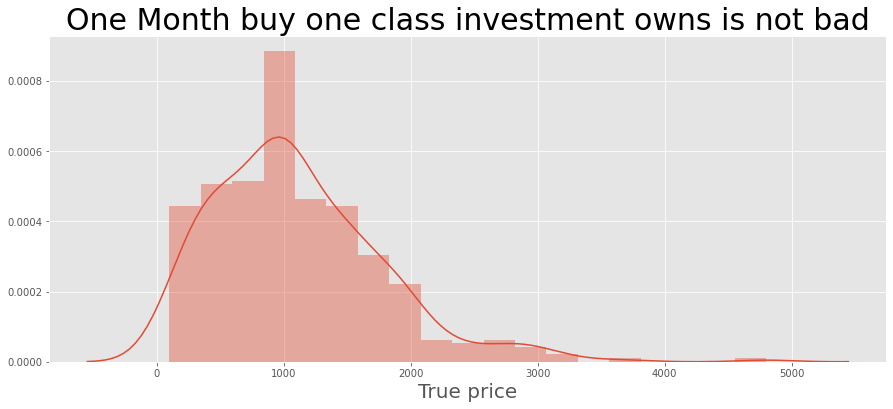

In [88]:
plt.style.use('ggplot')
print(df.price.describe())
plt.figure(figsize= (15, 6))
sns.distplot(df.prePrice, kde=True)
plt.title('One Month buy one class investment owns is not bad', fontsize=30)
plt.xlabel('True price', fontsize=20)